# Exercise 3

Create a neural network using the breast cancer dataset

In [205]:
import tensorflow as tf
tf.random.set_seed(42)

## 1. Import the dataset

In [206]:
# put your answer here
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [207]:
data = load_breast_cancer()

In [208]:
# Convert to Data Frame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [209]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Feature Selection

In [210]:
X = df.drop('target', axis=1)
y = df['target']

## 2. Build the neural network

In [211]:
# Import `Sequential` from `keras.models`
from tensorflow.keras import layers

In [212]:
# Initialize the constructor
model = tf.keras.Sequential()

In [213]:
# Add an input layer
model.add(layers.Dense(128, activation = 'sigmoid', input_shape=(30,)))
# Hidden Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# Add Dropout layer
model.add(layers.Dropout(0.2))
# Add an output layer
model.add(layers.Dense(2, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Compile the model

- Use SGD as Optimizer

- Use categorical_crossentropy as loss function

- Use accuracy as metrics

In [214]:
# put your answer here
optimizer_model = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer_model,
              metrics=['accuracy'])

## 4. Summarize the model

- Check model layers
- Understand number of trainable parameters

In [215]:
# put your answer here
print(len(model.layers))
print(len(model.inputs))
print(len(model.outputs))

5
1
1


In [216]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,370 (56.13 KB)

 Trainable params: 14,370 (56.13 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.get_config()

{'name': 'sequential_7',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 30),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_7'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_24',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 128,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel

## 5. Fit the model


In [218]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to watch
    patience=30,             # Wait 3 epochs with no improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [220]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [222]:
# put your answer here
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3917 - loss: 0.7500 - val_accuracy: 0.3684 - val_loss: 0.7052
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5426 - loss: 0.6773 - val_accuracy: 0.7368 - val_loss: 0.6527
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6788 - loss: 0.6427 - val_accuracy: 0.8538 - val_loss: 0.6150
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7702 - loss: 0.6193 - val_accuracy: 0.8480 - val_loss: 0.5831
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8337 - loss: 0.5821 - val_accuracy: 0.8713 - val_loss: 0.5511
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8260 - loss: 0.5610 - val_accuracy: 0.9006 - val_loss: 0.5228
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8588 - loss: 0.5279 - val_accuracy: 0.9006 - val_loss: 0.5006
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8580 - loss: 0.5101 - val_accuracy: 0.9064 - 

# Graph History of Steps

In [223]:
# Graph the accuracy and loss of the trained model
import matplotlib.pyplot as plt
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'validation'], loc='upper left')
  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')

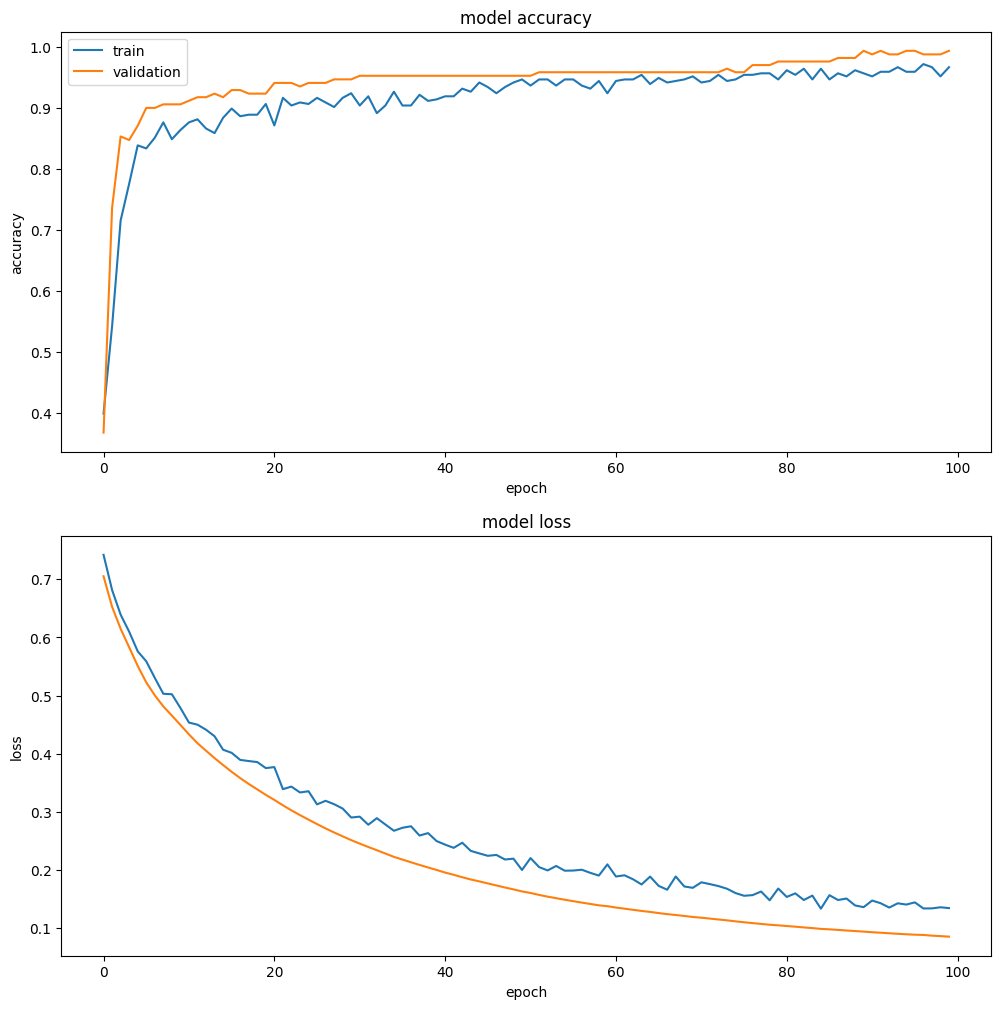

In [224]:
plot_history(history)

## 6. Evaluate the model

In [225]:
# put your answer here
import numpy as np
y_pred = np.round(model.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [226]:
y_pred[0:10]

array([[0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.]], dtype=float32)

In [227]:
model.evaluate(X_test,  y_test, verbose=2)

6/6 - 0s - 54ms/step - accuracy: 0.9942 - loss: 0.0858


[0.08582831174135208, 0.9941520690917969]

## 7. Save the model

In [229]:
# put your answer here
model.save('my_model.keras')

In [231]:
my_saved_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
my_saved_model.summary()

# Evaluate the restored model
loss, acc = my_saved_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(my_saved_model.predict(X_test).shape)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,372 (56.14 KB)

 Trainable params: 14,370 (56.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

6/6 - 1s - 182ms/step - accuracy: 0.9942 - loss: 0.0858
Restored model, accuracy: 99.42%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
(171, 2)
